In [8]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [9]:
import pandas as pd
import numpy as np

data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
data = pd.read_csv(r'data/iris.csv')
#  显示前N行数据，默认为5
# data.head()
#  显示后N行数据，默认为5
# data.tail()
# 随机选取N行，默认为1
# data.sample(10) 
# 将类别文本映射成数值类型
data['Species'] = data['Species'].map({'virginica':0,'setosa':1,'versicolor':2})
# 删除不需要的一列
data.drop('Id',axis=1,inplace=True)
# data.head(10) 
# 查看重复数据
# 判定是否有重复
data.duplicated().any()
# 删除重复数据
data.drop_duplicates(inplace=True)
len(data)
# 查看各类花的记录数
data['Species'].value_counts()

2    50
1    50
0    49
Name: Species, dtype: int64

In [11]:
class KNN:
    """使用python实现K近邻算法（实现分类）"""
    def __init__(self,k):
        """初始化方法
        Parameters
        ------
        k: int 邻居的个数
        """
        self.k = k

    def fit(self, X, y):
        """训练方法
        Parameters
        ------
            X: 类数组类型，形状为：{样本数量,特征数量}
                待训练的样本特征（属性）
            y: 类数组类型，形状为：{样本数量}
                每个样本的目标值（标签）
        """
        self.X = np.asarray(X)
        self.y = np.asarray(y)

    def predict(self, X):
        """根据参数传递样本，对样本数据进行预测
        Parameters
        ------
            X: 类数组类型，形状为：{样本数量,特征数量}
                待训练的样本特征（属性）
            :returns
            ----
            result:数组类型
                预测结果
        """
        X = np.asarray(X)
        result = []
        for x in X:
            # 欧氏距离
            # 对于测试集中的每一个小样，依次与训练集中的所有样本求距离
            dis = np.sqrt(np.sum((x - self.X) ** 2 , axis=1))
            # 返回数组排序后，每个元素在原数组（排序之前的数组）中的索引
            index = dis.argsort()
            # 进行截断，只取前k个元素（取距离最近的k个元素的索引）
            index = index[:self.k]
            # 返回数组中每个元素出现的次数。元素必须是非负的整数
            count = np.bincount(self.y[index])
            # 返回ndarray数组中，值最大的元素对应的索引。该索引就是判定的类别
            # 最大元素索引，就是出现次数最多的元素
            result.append(count.argmax());
        return result
    def predict2(self, X):
        """根据参数传递样本，对样本数据进行预测
        Parameters
        ------
            X: 类数组类型，形状为：{样本数量,特征数量}
                待训练的样本特征（属性）
            :returns
            ----
            result:数组类型
                预测结果
        """
        X = np.asarray(X)
        result = []
        for x in X:
            # 欧氏距离
            # 对于测试集中的每一个小样，依次与训练集中的所有样本求距离
            dis = np.sqrt(np.sum((x - self.X) ** 2,axis=1))
            # 返回数组排序后，每个元素在原数组（排序之前的数组）中的索引
            index = dis.argsort()
            # 进行截断，只取前k个元素（取距离最近的k个元素的索引）
            index = index[:self.k]
            # 返回数组中每个元素出现的次数的倒数。元素必须是非负的整数
            # 使用weights考虑权重，权重为距离的倒数
            count = np.bincount(self.y[index], weights=1/dis[index])
            # 返回ndarray数组中，值最大的元素对应的索引。该索引就是判定的类别
            # 最大元素索引，就是出现次数最多的元素
            result.append(count.argmax());
        return result

In [12]:
# 提取出每个类别的花数据
t0 = data[data['Species'] == 0]
t1 = data[data['Species'] == 1]
t2 = data[data['Species'] == 2]
# 对每个类别的数据进行打乱
t0 = t0.sample(len(t0),random_state=0)
t1 = t1.sample(len(t1),random_state=0)
t2 = t2.sample(len(t2),random_state=0)
# 构造训练集和测试集
train_X = pd.concat([t0.iloc[:40,:-1],t1.iloc[:40,:-1],t2.iloc[:40,:-1]],axis=0)
train_y = pd.concat([t0.iloc[:40,-1],t1.iloc[:40,-1],t2.iloc[:40,-1]],axis=0)
test_X = pd.concat([t0.iloc[40:,:-1],t1.iloc[40:,:-1],t2.iloc[40:,:-1]],axis=0)
test_y = pd.concat([t0.iloc[40:,-1],t1.iloc[40:,-1],t2.iloc[40:,-1]],axis=0)
# 创建knn对象，进行训练
knn = KNN(k=3)
# 进行训练
knn.fit(train_X,train_y)
# 进行测试
result = knn.predict(test_X)
# display(result)
# display(test_y)
# display(np.sum(result == test_y))
# display(np.sum(result == test_y)/len(result))

In [13]:
t0.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
129,7.2,3.0,5.8,1.6,0
104,6.5,3.0,5.8,2.2,0
126,6.2,2.8,4.8,1.8,0
130,7.4,2.8,6.1,1.9,0
132,6.4,2.8,5.6,2.2,0


In [14]:
# 使用权重，进行测试
result2 = knn.predict2(test_X)
# display(np.sum(result2 == test_y))

In [15]:
# KNN可视化
import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
# 默认情况下，matplotlib不支持中文显示。需要设置
# 设置字体为黑体，以支持中文显示
mpl.rcParams['font.family'] = 'SimHei'
# 设置在中文字体时，能够正常的显示负号(-)
mpl.rcParams['axes.unicode_minus'] = False

In [17]:
# 设置画布大小
plt.figure(figsize=(10,10))

In [18]:
# {'virginica':0,'setosa':1,'versicolor':2}
# sepal length (cm) petal length (cm)
# 绘制训练集数据
plt.scatter(x=t0['Sepal.Length'][:40], y=t0['Petal.Length'][:40], color='r' , label='virginica') # virginica
plt.scatter(x=t1['Sepal.Length'][:40], y=t1['Petal.Length'][:40], color='g' , label='setosa') # setosa
plt.scatter(x=t2['Sepal.Length'][:40], y=t2['Petal.Length'][:40], color='b' , label='versicolor') # versicolor

In [19]:
# 绘制测试集数据
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right['Sepal.Length'], y=right['Petal.Length'], marker='x', color='c' , label='right') # right
plt.scatter(x=wrong['Sepal.Length'], y=wrong['Petal.Length'], marker='>', color='m' , label='wrong') # wrong

In [20]:
plt.xlabel('花萼长度')
plt.ylabel('花瓣长度')

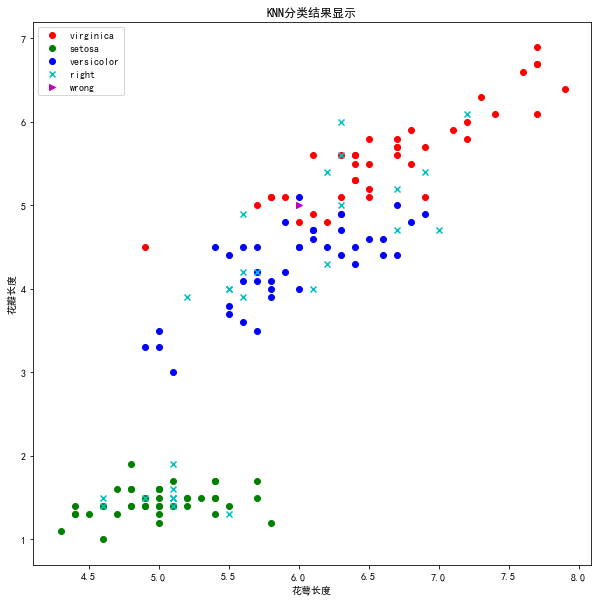

In [21]:
plt.title('KNN分类结果显示')
plt.legend(loc='best')
plt.show()